In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_regression
from sklearn.datasets import make_friedman1
from sklearn.datasets import make_classification
from adspy_shared_utilities import load_crime_dataset

np.set_printoptions(precision=2)

# Modelos para regressão linear

## Regressão Linear

In [12]:
from sklearn.linear_model import LinearRegression

X_R1, y_R1 = make_regression(n_samples=100, n_features=1,
                             n_informative=1, bias=150.0,
                             noise=30, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)

lin_reg = LinearRegression().fit(X_train, y_train)

print(f'Coeficiente do modelo linear (w): {lin_reg.coef_}')
print(f'Intercepto do modelo linear (b): {lin_reg.intercept_:.3f}')
print(f'Pontuação R^2 (treinamento): {lin_reg.score(X_train, y_train):.3f}')
print(f'Pontuação R^2 (teste): {lin_reg.score(X_test, y_test):.3f}')

Coeficiente do modelo linear (w): [45.71]
Intercepto do modelo linear (b): 148.446
Pontuação R^2 (treinamento): 0.679
Pontuação R^2 (teste): 0.492


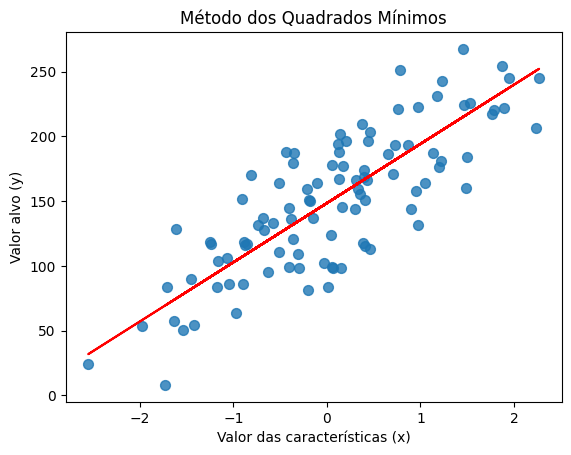

In [14]:
plt.figure()
plt.scatter(X_R1, y_R1, marker='o', s=50, alpha=0.8)
plt.plot(X_R1, lin_reg.coef_ * X_R1 + lin_reg.intercept_, 'r-')
plt.title('Método dos Quadrados Mínimos')
plt.xlabel('Valor das características (x)')
plt.ylabel('Valor alvo (y)')
plt.show()

In [16]:
X_crime, y_crime = load_crime_dataset()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state=0)

lin_reg = LinearRegression().fit(X_train, y_train)

print('Conjunto de dados de crimes.')
print(f'Intercepto do modelo linear: {lin_reg.intercept_}')
print(f'Coeficiente do modelo linear:\n {lin_reg.coef_}')
print(f'Pontuação do R^2 (treinamento): {lin_reg.score(X_train, y_train):.3f}')
print(f'Pontuação do R^2 (teste): {lin_reg.score(X_test, y_test):.3f}')

Conjunto de dados de crimes.
Intercepto do modelo linear: -1728.1306726033304
Coeficiente do modelo linear:
 [ 1.62e-03 -9.43e+01  1.36e+01 -3.13e+01 -8.15e-02 -1.69e+01 -2.43e-03
  1.53e+00 -1.39e-02 -7.72e+00  2.28e+01 -5.66e+00  9.35e+00  2.07e-01
 -7.43e+00  9.66e-03  4.38e-03  4.80e-03 -4.46e+00 -1.61e+01  8.83e+00
 -5.07e-01 -1.42e+00  8.18e+00 -3.87e+00 -3.54e+00  4.49e+00  9.31e+00
  1.74e+02  1.18e+01  1.51e+02 -3.30e+02 -1.35e+02  6.95e-01 -2.38e+01
  2.77e+00  3.82e-01  4.39e+00 -1.06e+01 -4.92e-03  4.14e+01 -1.16e-03
  1.19e+00  1.75e+00 -3.68e+00  1.60e+00 -8.42e+00 -3.80e+01  4.74e+01
 -2.51e+01 -2.88e-01 -3.66e+01  1.90e+01 -4.53e+01  6.83e+02  1.04e+02
 -3.29e+02 -3.14e+01  2.74e+01  5.12e+00  6.92e+01  1.98e-02 -6.12e-01
  2.65e+01  1.01e+01 -1.59e+00  2.24e+00  7.38e+00 -3.14e+01 -9.78e-05
  5.02e-05 -3.48e-04 -2.50e-04 -5.27e-01 -5.17e-01 -4.10e-01  1.16e-01
  1.46e+00 -3.04e-01  2.44e+00 -3.66e+01  1.41e-01  2.89e-01  1.77e+01
  5.97e-01  1.98e+00 -1.36e-01 -1.85e+0

## Regressão Ridge

In [19]:
from sklearn.linear_model import Ridge

lin_ridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Conjunto de dados de crimes.')
print(f'Intercepto do modelo linear Ridge: {lin_ridge.intercept_}')
print(f'Coeficiente do modelo linear Ridge:\n {lin_ridge.coef_}')
print(f'Pontuação do R^2 (treinamento): {lin_ridge.score(X_train, y_train):.3f}')
print(f'Pontuação do R^2 (teste): {lin_ridge.score(X_test, y_test):.3f}')
print(f'Número de características não nulas: {np.sum(lin_ridge.coef_ != 0)}')

Conjunto de dados de crimes.
Intercepto do modelo linear Ridge: -3352.4230358460145
Coeficiente do modelo linear Ridge:
 [ 1.95e-03  2.19e+01  9.56e+00 -3.59e+01  6.36e+00 -1.97e+01 -2.81e-03
  1.66e+00 -6.61e-03 -6.95e+00  1.72e+01 -5.63e+00  8.84e+00  6.79e-01
 -7.34e+00  6.70e-03  9.79e-04  5.01e-03 -4.90e+00 -1.79e+01  9.18e+00
 -1.24e+00  1.22e+00  1.03e+01 -3.78e+00 -3.73e+00  4.75e+00  8.43e+00
  3.09e+01  1.19e+01 -2.05e+00 -3.82e+01  1.85e+01  1.53e+00 -2.20e+01
  2.46e+00  3.29e-01  4.02e+00 -1.13e+01 -4.70e-03  4.27e+01 -1.23e-03
  1.41e+00  9.35e-01 -3.00e+00  1.12e+00 -1.82e+01 -1.55e+01  2.42e+01
 -1.32e+01 -4.20e-01 -3.60e+01  1.30e+01 -2.81e+01  4.39e+01  3.87e+01
 -6.46e+01 -1.64e+01  2.90e+01  4.15e+00  5.34e+01  1.99e-02 -5.47e-01
  1.24e+01  1.04e+01 -1.57e+00  3.16e+00  8.78e+00 -2.95e+01 -2.34e-04
  3.14e-04 -4.13e-04 -1.80e-04 -5.74e-01 -5.18e-01 -4.21e-01  1.53e-01
  1.33e+00  3.85e+00  3.03e+00 -3.78e+01  1.38e-01  3.08e-01  1.57e+01
  3.31e-01  3.36e+00  1.61e

## Regressão Ridge com características (features) normalizadas

In [23]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

lin_ridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Conjunto de dados de crimes.')
print(f'Intercepto do modelo linear Ridge: {lin_ridge.intercept_}')
print(f'Coeficiente do modelo linear Ridge:\n {lin_ridge.coef_}')
print(f'Pontuação do R^2 (treinamento): {lin_ridge.score(X_train_scaled, y_train):.3f}')
print(f'Pontuação do R^2 (teste): {lin_ridge.score(X_test_scaled, y_test):.3f}')
print(f'Número de características não nulas: {np.sum(lin_ridge.coef_ != 0)}')

Conjunto de dados de crimes.
Intercepto do modelo linear Ridge: 933.390638504416
Coeficiente do modelo linear Ridge:
 [  88.69   16.49  -50.3   -82.91  -65.9    -2.28   87.74  150.95   18.88
  -31.06  -43.14 -189.44   -4.53  107.98  -76.53    2.86   34.95   90.14
   52.46  -62.11  115.02    2.67    6.94   -5.67 -101.55  -36.91   -8.71
   29.12  171.26   99.37   75.07  123.64   95.24 -330.61 -442.3  -284.5
 -258.37   17.66 -101.71  110.65  523.14   24.82    4.87  -30.47   -3.52
   50.58   10.85   18.28   44.11   58.34   67.09  -57.94  116.14   53.81
   49.02   -7.62   55.14  -52.09  123.39   77.13   45.5   184.91  -91.36
    1.08  234.09   10.39   94.72  167.92  -25.14   -1.18   14.6    36.77
   53.2   -78.86   -5.9    26.05  115.15   68.74   68.29   16.53  -97.91
  205.2    75.97   61.38  -79.83   67.27   95.67  -11.88]
Pontuação do R^2 (treinamento): 0.615
Pontuação do R^2 (teste): 0.620
Número de características não nulas: 88


## Regressão Ridge com regularização do parâmetro $\alpha$.

In [36]:
print('Regressão Ridge: Efeito da regularização do parâmetro alpha\n')

list = [0, 1, 10, 20, 50, 100, 1000]

for this_alpha in list:
    lin_ridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = lin_ridge.score(X_train_scaled, y_train)
    r2_test = lin_ridge.score(X_test_scaled, y_test)
    big_coef = np.sum(abs(lin_ridge.coef_) > 1.0)
    print(f'Alpha = {this_alpha:.2f}\n abs(coeff) > 1.0: {big_coef:.2f},\
 R^2 (treinamento): {r2_train:.2f}, R^2 (teste): {r2_test:.2f}')

Regressão Ridge: Efeito da regularização do parâmetro alpha

Alpha = 0.00
 abs(coeff) > 1.0: 88.00, R^2 (treinamento): 0.67, R^2 (teste): -4625911019249302715236352.00
Alpha = 1.00
 abs(coeff) > 1.0: 87.00, R^2 (treinamento): 0.66, R^2 (teste): 0.61
Alpha = 10.00
 abs(coeff) > 1.0: 87.00, R^2 (treinamento): 0.63, R^2 (teste): 0.63
Alpha = 20.00
 abs(coeff) > 1.0: 88.00, R^2 (treinamento): 0.61, R^2 (teste): 0.62
Alpha = 50.00
 abs(coeff) > 1.0: 86.00, R^2 (treinamento): 0.58, R^2 (teste): 0.59
Alpha = 100.00
 abs(coeff) > 1.0: 87.00, R^2 (treinamento): 0.55, R^2 (teste): 0.56
Alpha = 1000.00
 abs(coeff) > 1.0: 84.00, R^2 (treinamento): 0.31, R^2 (teste): 0.31
